<a href="https://colab.research.google.com/github/EverlongQQQ/speaker-lab/blob/main/notebooks/00_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===== SETUP =====
from google.colab import drive
import os

# Подключаем Google Drive
drive.mount('/content/drive', force_remount=True)

# Пути к проекту
PROJECT_PATH = "/content/drive/MyDrive/speaker_lab_drive"
DATA_PATH = os.path.join(PROJECT_PATH, "data")
MODELS_PATH = os.path.join(PROJECT_PATH, "models")
NOTEBOOKS_PATH = os.path.join(PROJECT_PATH, "notebooks")
UTILS_PATH = os.path.join(PROJECT_PATH, "utils")

# Создаём директории если их нет
for p in [DATA_PATH, MODELS_PATH, NOTEBOOKS_PATH, UTILS_PATH]:
    os.makedirs(p, exist_ok=True)

print("Project root:", PROJECT_PATH)
print("Data folder:", DATA_PATH)
print("Models folder:", MODELS_PATH)

Mounted at /content/drive
Project root: /content/drive/MyDrive/speaker_lab_drive
Data folder: /content/drive/MyDrive/speaker_lab_drive/data
Models folder: /content/drive/MyDrive/speaker_lab_drive/models


In [ ]:
!pip install librosa matplotlib numpy scipy torch torchaudio speechbrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 41.6 MB/s eta 0:00:00


Длительность: 26.01 сек, sample rate=16000


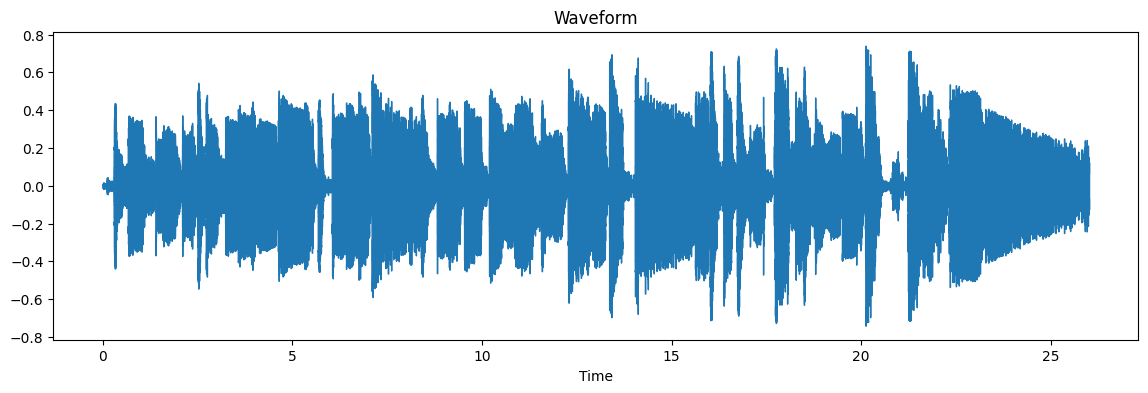

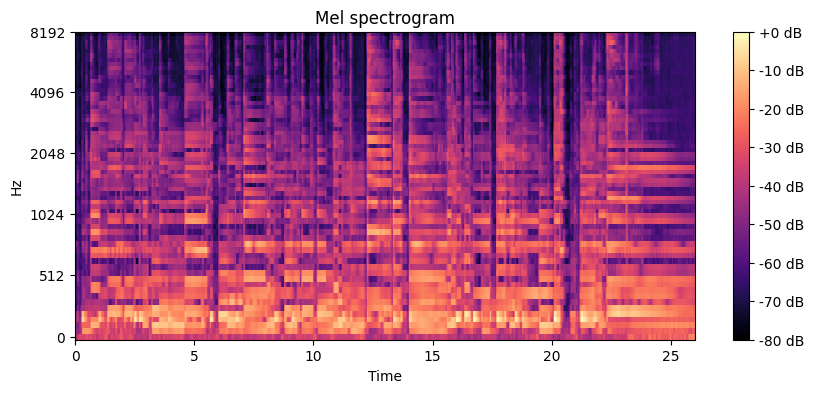

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Загружаем аудио
audio_path = os.path.join(DATA_PATH, "gc.wav")
y, sr = librosa.load(audio_path, sr=16000)

print(f"Длительность: {len(y)/sr:.2f} сек, sample rate={sr}")

# Отображаем форму сигнала
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()

# Строим спектрограмму
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel spectrogram")
plt.show()
